In [81]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [82]:
gene = []
for i in range(1,101):
    tempgene = 'gene'+str(i)
    gene.append(tempgene)
print(gene)

['gene1', 'gene2', 'gene3', 'gene4', 'gene5', 'gene6', 'gene7', 'gene8', 'gene9', 'gene10', 'gene11', 'gene12', 'gene13', 'gene14', 'gene15', 'gene16', 'gene17', 'gene18', 'gene19', 'gene20', 'gene21', 'gene22', 'gene23', 'gene24', 'gene25', 'gene26', 'gene27', 'gene28', 'gene29', 'gene30', 'gene31', 'gene32', 'gene33', 'gene34', 'gene35', 'gene36', 'gene37', 'gene38', 'gene39', 'gene40', 'gene41', 'gene42', 'gene43', 'gene44', 'gene45', 'gene46', 'gene47', 'gene48', 'gene49', 'gene50', 'gene51', 'gene52', 'gene53', 'gene54', 'gene55', 'gene56', 'gene57', 'gene58', 'gene59', 'gene60', 'gene61', 'gene62', 'gene63', 'gene64', 'gene65', 'gene66', 'gene67', 'gene68', 'gene69', 'gene70', 'gene71', 'gene72', 'gene73', 'gene74', 'gene75', 'gene76', 'gene77', 'gene78', 'gene79', 'gene80', 'gene81', 'gene82', 'gene83', 'gene84', 'gene85', 'gene86', 'gene87', 'gene88', 'gene89', 'gene90', 'gene91', 'gene92', 'gene93', 'gene94', 'gene95', 'gene96', 'gene97', 'gene98', 'gene99', 'gene100']


In [83]:
wt=[]
ko=[]
for i in range(1,6):
    tempwt='wt'+str(i)
    tempko='ko'+str(i)
    ko.append(tempko)
    wt.append(tempwt)

In [84]:
data=pd.DataFrame(columns=[*wt,*ko],index=gene)

In [85]:
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)

In [86]:
data.head()
data.info

<bound method DataFrame.info of          wt1  wt2  wt3  wt4  wt5  ko1  ko2   ko3  ko4  ko5
gene1    778  789  743  766  820  192  182   163  168  162
gene2    914  880  885  861  883  878  849   788  845  833
gene3     37   45   39   43   52  188  194   189  184  199
gene4    205  210  186  189  197  958  947  1013  952  990
gene5     74   56   42   54   46  155  160   150  142  151
...      ...  ...  ...  ...  ...  ...  ...   ...  ...  ...
gene96    86   98   92   85   94   78   73    79   79  104
gene97    24   32   28   31   26  167  139   163  173  187
gene98   563  612  596  593  598  256  262   279  258  268
gene99   266  236  227  213  208  407  438   440  465  451
gene100  704  685  787  682  758   31   35    24   46   43

[100 rows x 10 columns]>

In [87]:
data = preprocessing.scale(data.T)

In [88]:
pca=PCA()

In [89]:
pca.fit(data)

PCA()

In [90]:
pca_Data=pca.transform(data)

In [91]:
pcamount=np.round(pca.explained_variance_ratio_*100,5)

In [92]:
len(pcamount)

10

In [93]:
labels =[]
for i in range(1,len(pcamount)+1):
    templabel = 'PC'+str(i)
    labels.append(templabel)
print(labels)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']


Text(0.5, 1.0, 'scree plot')

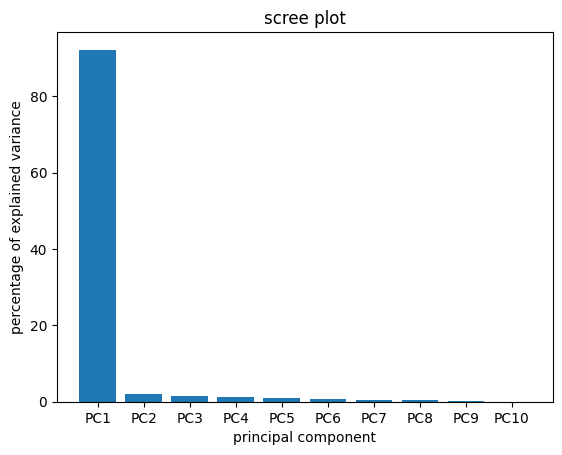

In [94]:
plt.bar(x=range(0,len(pcamount)),height=pcamount,tick_label=labels)
plt.ylabel('percentage of explained variance')
plt.xlabel('principal component')
plt.title('scree plot')

In [95]:
pca_df= pd.DataFrame(pca_Data,index=[*wt,*ko],columns=labels)

Text(0, 0.5, 'PC2 - 2.0383%')

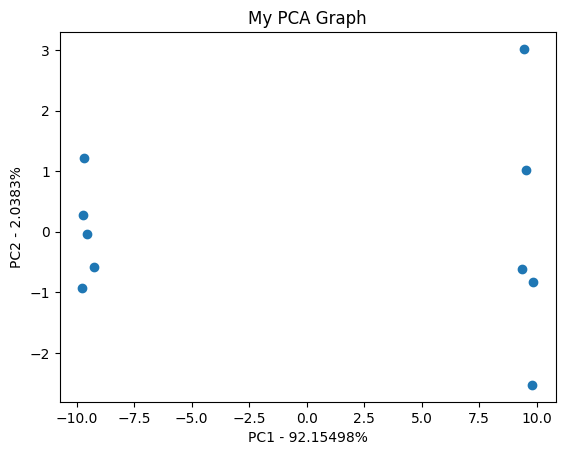

In [96]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(pcamount[0]))
plt.ylabel('PC2 - {0}%'.format(pcamount[1]))